## Final Project
### Authors: Naat Ambrosino, Jerrin Redmon
### Version: 1
### Semester: Spring 2022

### Information from Dataset Source:
#### Data Set Information:
##### This data set contains some training and testing data from a remote sensing study by Johnson et al. (2013) that involved detecting diseased trees in Quickbird imagery. There are few training samples for the 'diseased trees' class (74) and many for 'other land cover' class (4265).

##### The data set consists of image segments, generated by segmenting the pansharpened image. The segments contain spectral information from the Quickbird multispectral image bands and texture information from the panchromatic (Pan) image band. The testing data set is for the row with â€œSegmentation scale 15â€ segments and â€œoriginal multi-spectral imageâ€ Spectral information in Table 2 of the reference (i.e. row 5). Please see the reference below for more information on the data set, and please cite the reference if you use this data set. Enjoy!

##### Files
##### training.csv: training data set (4339 image segments)
##### testing.csv: testing data set (500 image segments)


#### Attribute Information:

##### class: 'w' (diseased trees), 'n' (all other land cover)
##### GLCM_Pan: GLCM mean texture (Pan band)
##### Mean_G: Mean green value
##### Mean_R: Mean red value
##### Mean_NIR: Mean NIR value
##### SD_Pan: Standard deviation (Pan band)



### Summary:
#### The dataset was made because some people were trying to detect disesased trees via arial photos (and then making a program that could 'see' the diseased trees in the photos. The data is different aspects of the image(s). 

Importing packages and reading in .csv files

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#From Logistic regression file
from sklearn.linear_model import LogisticRegression

In [2]:
dtesting=pd.read_csv("testing.csv")
dtraining=pd.read_csv("training.csv")

It seems like the dataset creators preemptively split the data into a training and testing set, just by looking at the CSV files proper and from the description from the site. I am going to combine them back into one dataframe for the exploratory analysis, then take new random samples once we begin the Machine Learning portion.

In [4]:
#dtesting

In [5]:
#dtraining

In [3]:
df=pd.concat([dtesting,dtraining],ignore_index=True,sort=False)

In [4]:
df

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,n,109.828571,183.700000,82.950000,251.750000,16.079412
1,n,130.284483,212.637931,96.896552,482.396552,21.210295
2,n,131.386555,185.466667,85.466667,419.666667,13.339998
3,n,141.345098,180.875000,81.500000,348.062500,18.213577
4,w,121.383408,218.357143,112.017857,426.607143,19.083196
...,...,...,...,...,...,...
4834,n,111.568773,203.588235,93.264706,403.735294,26.512777
4835,n,125.435240,206.394161,93.058394,512.270073,33.466060
4836,n,132.123859,465.343750,295.333333,499.250000,38.762967
4837,n,124.469536,215.152632,98.484211,675.915789,28.506542


In [6]:
df.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000
mean,126.855547,231.412658,116.305331,525.800301,24.482007
std,13.450516,63.264941,62.005622,156.579297,10.726997
min,0.000000,117.210526,50.578947,86.500000,0.000000
25%,118.758944,203.896429,91.527009,415.448161,17.679972
50%,127.481872,219.260870,101.631579,518.657143,23.198396
75%,134.947789,239.860577,116.969687,635.133450,29.326445
max,183.281250,1848.916667,1594.583333,1597.333333,156.508431


In [7]:
df.isna()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4834,False,False,False,False,False,False
4835,False,False,False,False,False,False
4836,False,False,False,False,False,False
4837,False,False,False,False,False,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4839 non-null   object 
 1   GLCM_pan    4839 non-null   float64
 2   Mean_Green  4839 non-null   float64
 3   Mean_Red    4839 non-null   float64
 4   Mean_NIR    4839 non-null   float64
 5   SD_pan      4839 non-null   float64
dtypes: float64(5), object(1)
memory usage: 227.0+ KB


<AxesSubplot:>

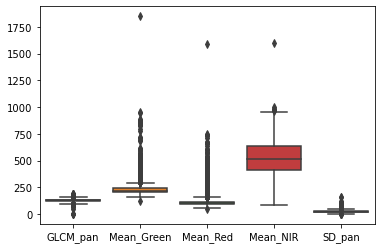

In [9]:
sns.boxplot(data=df)

<AxesSubplot:>

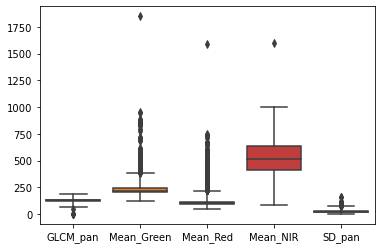

In [10]:
sns.boxplot(data=df, whis=4)

<AxesSubplot:>

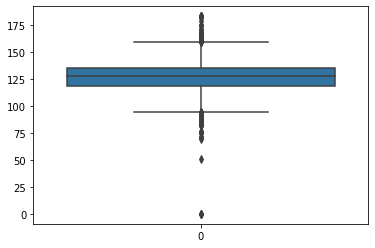

In [11]:
sns.boxplot(data=df.GLCM_pan)

In [12]:
findGLCMpan=df.query('GLCM_pan<25')
findGLCMpan

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
1482,n,0.0,450.0,279.0,592.0,0.0
1493,n,0.0,313.0,207.0,416.0,0.0
1515,n,0.0,328.0,223.0,384.0,0.0
2813,n,0.0,336.0,190.0,579.0,0.0


In [13]:
#Those really far outliars in GLCM_pan are 1482, 1493, 1515, and 2813

<AxesSubplot:>

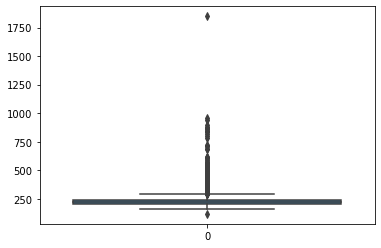

In [14]:
sns.boxplot(data=df.Mean_Green)

In [15]:
findMeanGreenOut=df.query('Mean_Green>1250')
findMeanGreenOut

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
479,n,117.109948,1848.916667,1594.583333,1597.333333,16.612412


In [33]:
#That really far outlier in Mean_Green is 479
#Running list of outliers: 479, 1482, 1493, 1515, 2813

<AxesSubplot:>

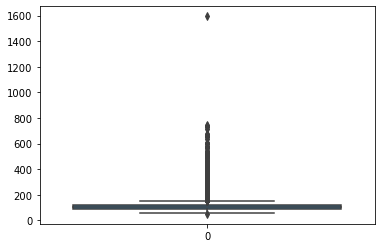

In [16]:
sns.boxplot(data=df.Mean_Red)

In [17]:
findMeanRedOut=df.query('Mean_Red>1250')
findMeanRedOut

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
479,n,117.109948,1848.916667,1594.583333,1597.333333,16.612412


In [ ]:
#That really far outlier in Mean_Red is 479, the same one as the outlier in Mean_Green. 
#Running list of outliers: 479, 1482, 1493, 1515, 2813
#On a good note, all of the major outliars so far are of the 'Not diseased' class

<AxesSubplot:>

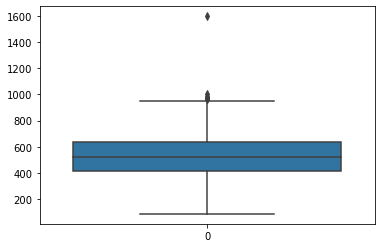

In [18]:
sns.boxplot(data=df.Mean_NIR)

In [19]:
findMeanNIROut=df.query('Mean_NIR>1250')
findMeanNIROut

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
479,n,117.109948,1848.916667,1594.583333,1597.333333,16.612412


In [40]:
#That really far outlier in Mean_NIR is 479, the same one as the outlier in Mean_Green and Mean_Red.
#Pretty good case for dropping 479 at this point.
#Running list of major outliers: 479, 1482, 1493, 1515, 2813
#On a good note, all of the major outliers so far are of the 'Not diseased' class.

<AxesSubplot:>

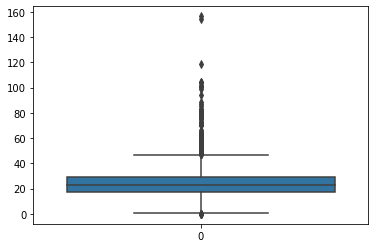

In [20]:
sns.boxplot(data=df.SD_pan)

In [30]:
findSDPanOut=df.query('SD_pan>115')
findSDPanOut

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
3451,n,104.302083,270.000000,146.0,430.0,154.573248
4466,n,114.452381,428.047619,278.0,518.0,118.857105
4691,n,93.979167,543.000000,367.0,396.0,156.508431


In [31]:
#The furthest outliers for SD_pan are 3451 and 4691, and the slightly closer one thats still separated is 4466.
#Running list of major outliers: 479, 1482, 1493, 1515, 2813, 3451, 4466, 4691
#On a good note, all of the major outliers have been of the 'Not diseased' class (n).

Since index 479 is an extreme outlier in three different columns, and is of the "not diseased" class (n) which has over 4000 entries, if we kept it in it would have a slight chance of giving the model a slight benefit (since it is just one point out of >4000), and due to its nature as an extreme outlier in several ways, would also have a high chance of causing problems within the model. So, we are going to drop it.

In [32]:
df

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,n,109.828571,183.700000,82.950000,251.750000,16.079412
1,n,130.284483,212.637931,96.896552,482.396552,21.210295
2,n,131.386555,185.466667,85.466667,419.666667,13.339998
3,n,141.345098,180.875000,81.500000,348.062500,18.213577
4,w,121.383408,218.357143,112.017857,426.607143,19.083196
...,...,...,...,...,...,...
4834,n,111.568773,203.588235,93.264706,403.735294,26.512777
4835,n,125.435240,206.394161,93.058394,512.270073,33.466060
4836,n,132.123859,465.343750,295.333333,499.250000,38.762967
4837,n,124.469536,215.152632,98.484211,675.915789,28.506542


In [33]:
df.iloc[479]
removedRow=df.iloc[479]

In [34]:
df.drop([479],inplace=True)

KeyError: '[479] not found in axis'

In [35]:
df

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,n,109.828571,183.700000,82.950000,251.750000,16.079412
1,n,130.284483,212.637931,96.896552,482.396552,21.210295
2,n,131.386555,185.466667,85.466667,419.666667,13.339998
3,n,141.345098,180.875000,81.500000,348.062500,18.213577
4,w,121.383408,218.357143,112.017857,426.607143,19.083196
...,...,...,...,...,...,...
4834,n,111.568773,203.588235,93.264706,403.735294,26.512777
4835,n,125.435240,206.394161,93.058394,512.270073,33.466060
4836,n,132.123859,465.343750,295.333333,499.250000,38.762967
4837,n,124.469536,215.152632,98.484211,675.915789,28.506542


In [36]:
#Note that there are now only 4838

<AxesSubplot:>

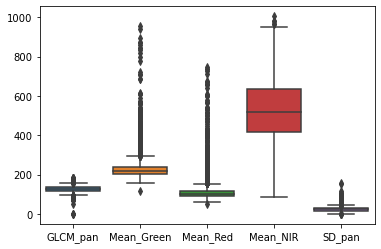

In [37]:
sns.boxplot(data=df)

In [110]:
print(df["class"])

0       healthy
1       healthy
2       healthy
3       healthy
4          sick
         ...   
4834    healthy
4835    healthy
4836    healthy
4837    healthy
4838    healthy
Name: class, Length: 4838, dtype: object


In [112]:
#changes the values of class n and w to healthy and sick to better tell them apart for the time being
df.loc[df["class"]== 1,"class"] = "healthy"
df.loc[df["class"]== 2,"class"] = "sick"

In [111]:
df

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,healthy,109.828571,183.700000,82.950000,251.750000,16.079412
1,healthy,130.284483,212.637931,96.896552,482.396552,21.210295
2,healthy,131.386555,185.466667,85.466667,419.666667,13.339998
3,healthy,141.345098,180.875000,81.500000,348.062500,18.213577
4,sick,121.383408,218.357143,112.017857,426.607143,19.083196
...,...,...,...,...,...,...
4834,healthy,111.568773,203.588235,93.264706,403.735294,26.512777
4835,healthy,125.435240,206.394161,93.058394,512.270073,33.466060
4836,healthy,132.123859,465.343750,295.333333,499.250000,38.762967
4837,healthy,124.469536,215.152632,98.484211,675.915789,28.506542


##### Difference between healthy and diseased trees
 we can see the amount of tree that are currently healthy or diseased

(array([4577.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         261.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

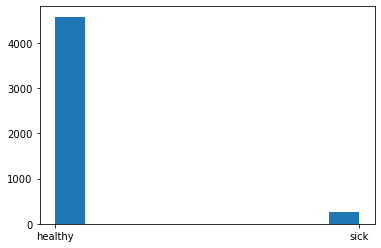

In [113]:
plt.hist(df["class"])